In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso

In [4]:
airbnb_df = pd.read_csv("airBNB.csv")

In [5]:
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb_df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
airbnb_df.shape

(48895, 16)

In [9]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [23]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
airbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
len(airbnb_df.neighbourhood.unique())

221

In [13]:
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [14]:
top_host=airbnb_df.host_id.value_counts().head(10)
top_host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [15]:
top_host_check=airbnb_df.calculated_host_listings_count.max()
top_host_check

327

In [16]:
airbnb_df.duplicated().sum()

0

In [17]:
airbnb_df.drop_duplicates()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [19]:
airbnb_df.dropna(subset=['name','host_name'], inplace=True)

In [21]:
airbnb_df['last_review'] = airbnb_df['last_review'].fillna(method='ffill')  # Forward fill

In [22]:
mean_reviews = airbnb_df['reviews_per_month'].mean()
airbnb_df['reviews_per_month'].fillna(mean_reviews, inplace=True)

In [24]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [36]:
airbnb_df['Day_Of_Week'] = pd.to_datetime(airbnb_df['last_review']).dt.day
airbnb_df['Month'] = pd.to_datetime(airbnb_df['last_review']).dt.month_name()
airbnb_df['Year'] = pd.to_datetime(airbnb_df['last_review']).dt.year
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Month,Year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,19,October,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,21,May,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373229,1,365,21,May,2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,5,July,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,19,November,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-07-08,1.373229,2,9,8,July,2019
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-07-08,1.373229,2,36,8,July,2019
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-07-08,1.373229,1,27,8,July,2019
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-07-08,1.373229,6,2,8,July,2019


In [37]:
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

airbnb_df['Seasons'] = airbnb_df['Month'].apply(get_season)
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Month,Year,Seasons
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,19,October,2018,Fall
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,21,May,2019,Spring
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373229,1,365,21,May,2019,Spring
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,5,July,2019,Summer
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,19,November,2018,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-07-08,1.373229,2,9,8,July,2019,Summer
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-07-08,1.373229,2,36,8,July,2019,Summer
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-07-08,1.373229,1,27,8,July,2019,Summer
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-07-08,1.373229,6,2,8,July,2019,Summer


In [38]:
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].round(2)

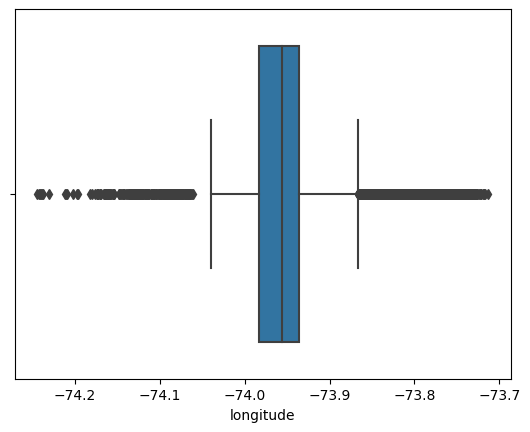

In [43]:
sns.boxplot(x=airbnb_df['longitude']);

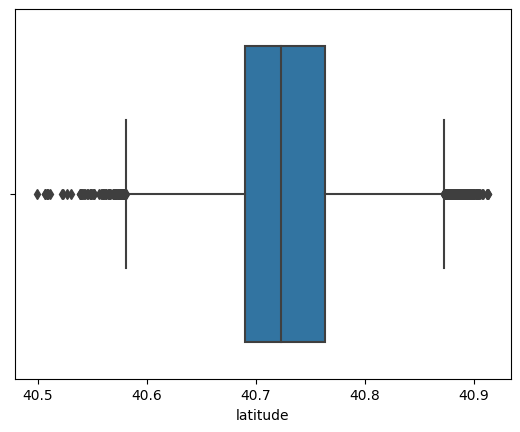

In [44]:
sns.boxplot(x=airbnb_df['latitude']);

In [39]:
airbnb_df.to_csv('airBNB_clean.csv')

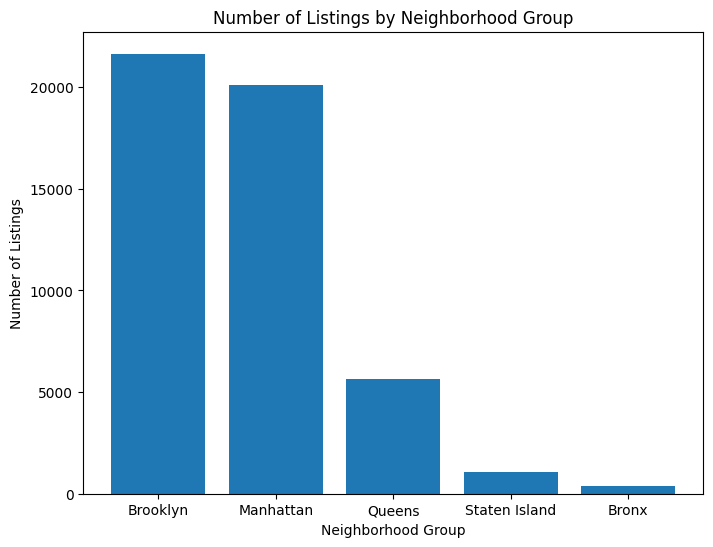

In [27]:
unique_neighborhood_groups = airbnb_df['neighbourhood_group'].unique()
group_counts = airbnb_df['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(unique_neighborhood_groups, group_counts)
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Neighborhood Group')
plt.show()


What is the range of prices for listings in each neighbourhood group?

<Figure size 1000x600 with 0 Axes>

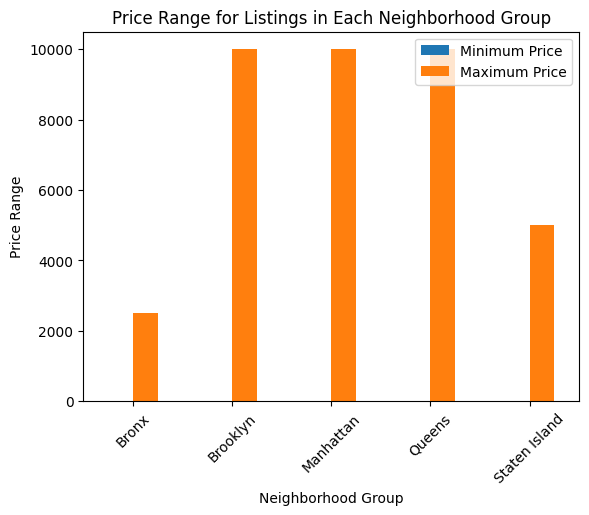

In [30]:
price_ranges = airbnb_df.groupby('neighbourhood_group')['price'].agg(['min', 'max'])

plt.figure(figsize=(10, 6))
price_ranges.plot(kind='bar')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price Range')
plt.title('Price Range for Listings in Each Neighborhood Group')
plt.xticks(rotation=45)
plt.legend(['Minimum Price', 'Maximum Price'])
plt.show()

What is the minimum and maximum price for each room type?

<Figure size 1000x600 with 0 Axes>

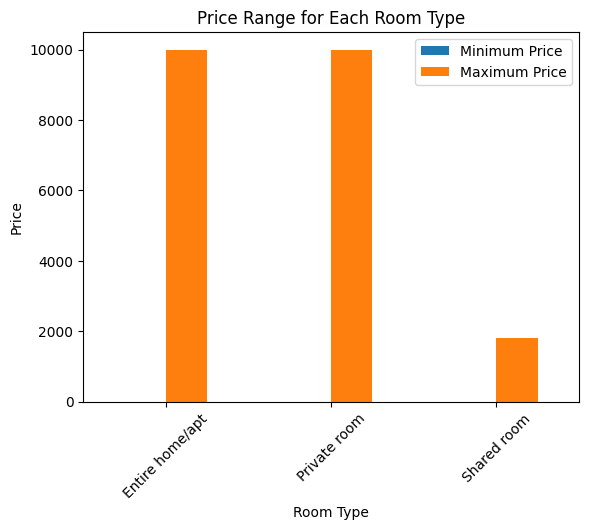

In [31]:
price_ranges = airbnb_df.groupby('room_type')['price'].agg(['min', 'max'])

plt.figure(figsize=(10, 6))
price_ranges.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Range for Each Room Type')
plt.xticks(rotation=45)
plt.legend(['Minimum Price', 'Maximum Price'])
plt.show()

Is there any correlation between the price and the number of reviews or reviews per month?

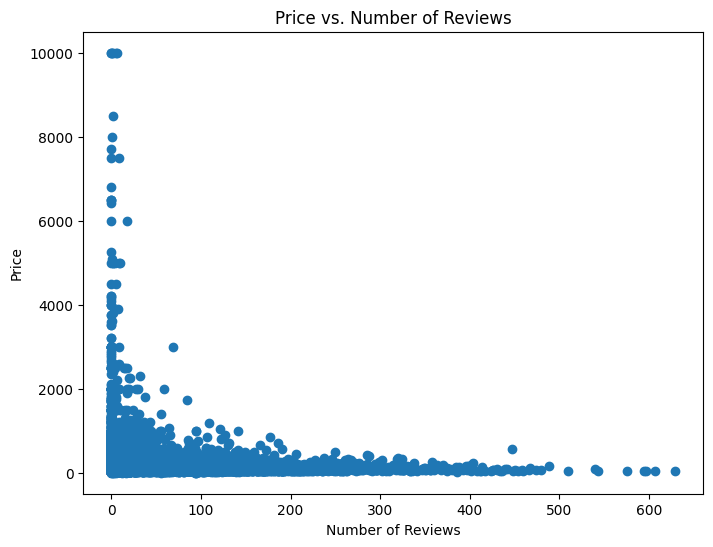

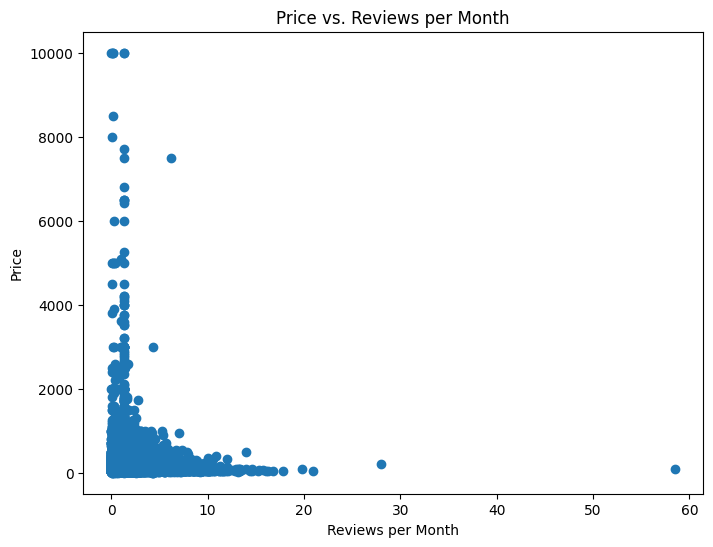

In [34]:
correlation_price_reviews = airbnb_df['price'].corr(airbnb_df['number_of_reviews'])
correlation_price_reviews_per_month = airbnb_df['price'].corr(airbnb_df['reviews_per_month'])

plt.figure(figsize=(8, 6))
plt.scatter(airbnb_df['number_of_reviews'], airbnb_df['price'])
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Number of Reviews')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(airbnb_df['reviews_per_month'],  airbnb_df['price'])
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.title('Price vs. Reviews per Month')
plt.show()

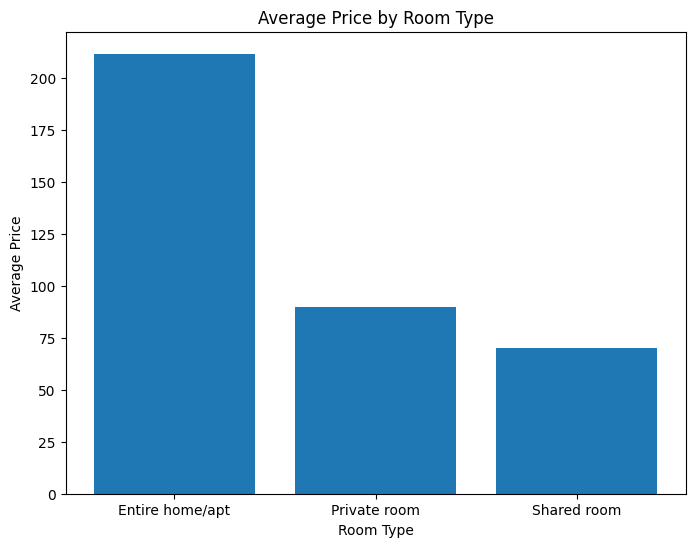

In [29]:
room_type_prices = airbnb_df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(room_type_prices['room_type'], room_type_prices['price'])
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

What is the distribution of calculated host listings count?

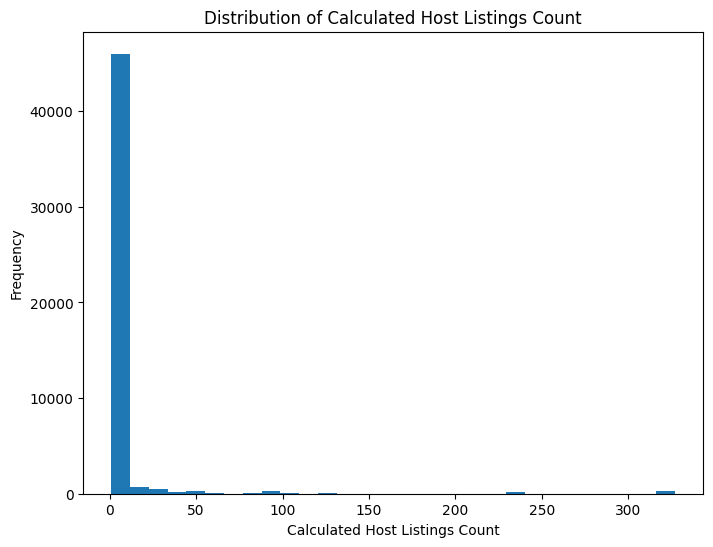

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(airbnb_df['calculated_host_listings_count'], bins=30)
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Frequency')
plt.title('Distribution of Calculated Host Listings Count')
plt.show()

What is the most common room type in the dataset?

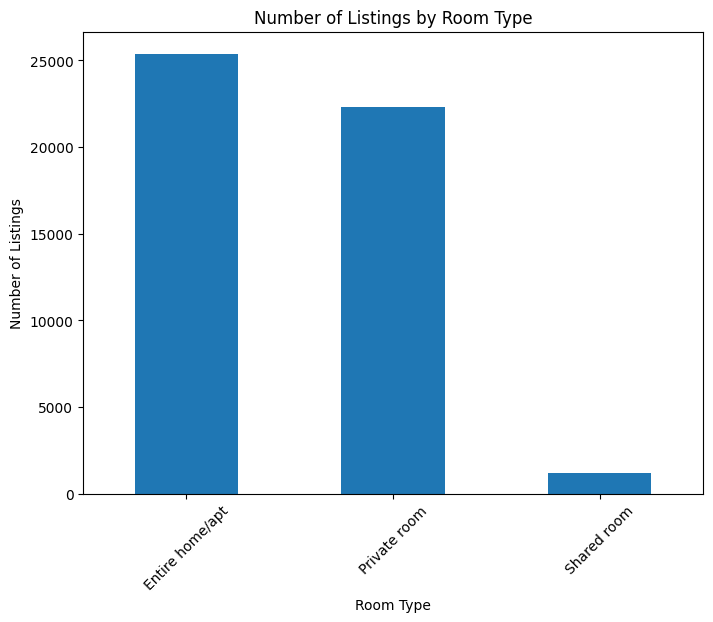

In [28]:
room_type_counts = airbnb_df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Room Type')
plt.xticks(rotation=45)
plt.show()

What is the correlation between price and availability?

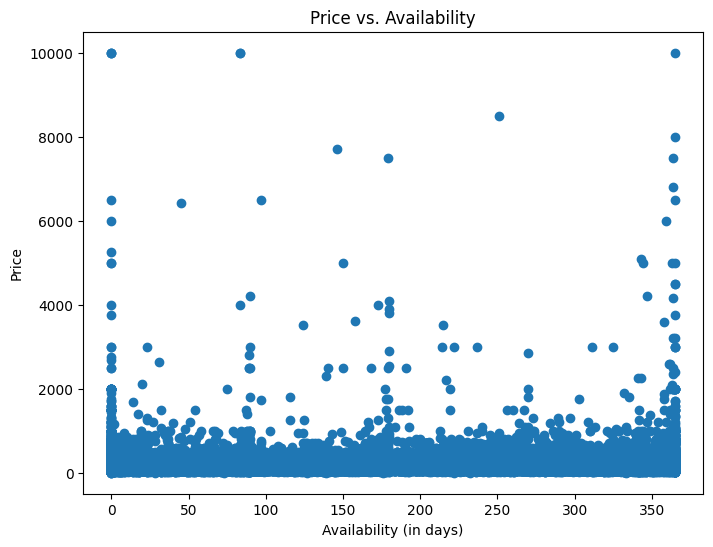

Correlation between Price and Availability: 0.08181709550826806


In [47]:


correlation_price_availability = airbnb_df['price'].corr(airbnb_df['availability_365'])

plt.figure(figsize=(8, 6))
plt.scatter(airbnb_df['availability_365'], airbnb_df['price'])
plt.xlabel('Availability (in days)')
plt.ylabel('Price')
plt.title('Price vs. Availability')
plt.show()

print("Correlation between Price and Availability:", correlation_price_availability)


What is the average price of listings in each neighbourhood group?

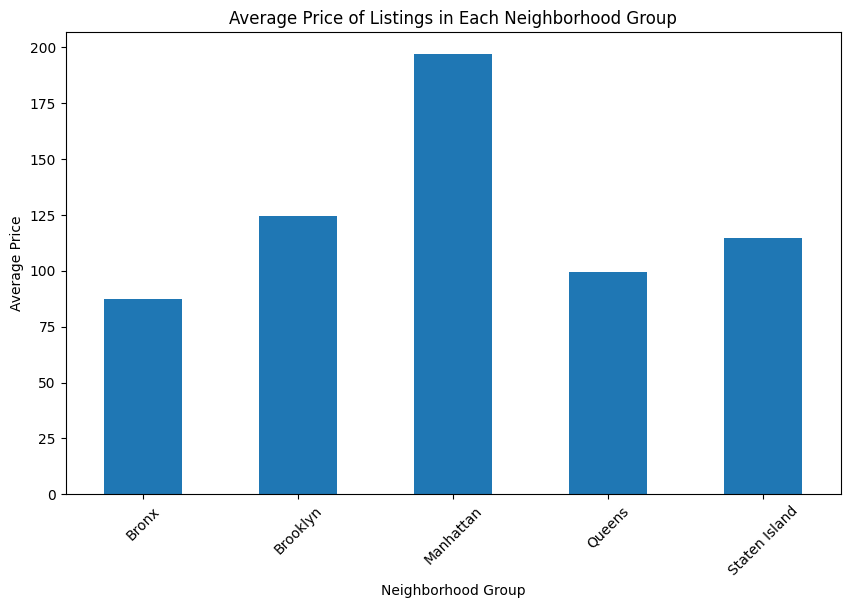

In [48]:
average_price_neighborhood = airbnb_df.groupby('neighbourhood_group')['price'].mean()

plt.figure(figsize=(10, 6))
average_price_neighborhood.plot(kind='bar')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.title('Average Price of Listings in Each Neighborhood Group')
plt.xticks(rotation=45)
plt.show()

What is the most common room type in the dataset?

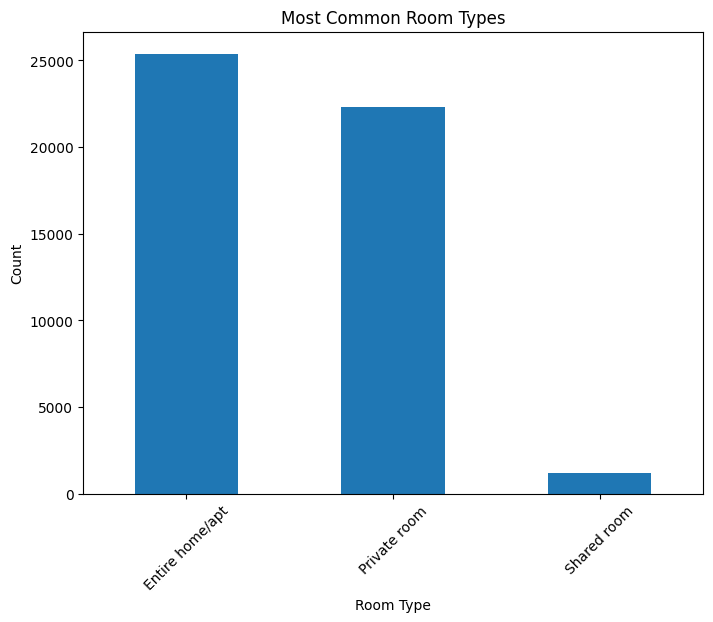

In [49]:
room_type_counts = airbnb_df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Most Common Room Types')
plt.xticks(rotation=45)
plt.show()

What is the minimum and maximum price for each room type?

<Figure size 1000x600 with 0 Axes>

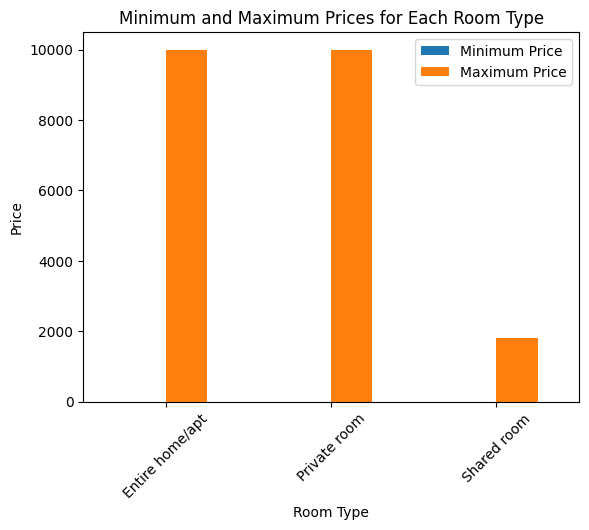

In [51]:
price_range_room_type = airbnb_df.groupby('room_type')['price'].agg(['min', 'max'])

plt.figure(figsize=(10, 6))
price_range_room_type.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Minimum and Maximum Prices for Each Room Type')
plt.xticks(rotation=45)
plt.legend(['Minimum Price', 'Maximum Price'])
plt.show()

What is the average number of reviews per month for listings?

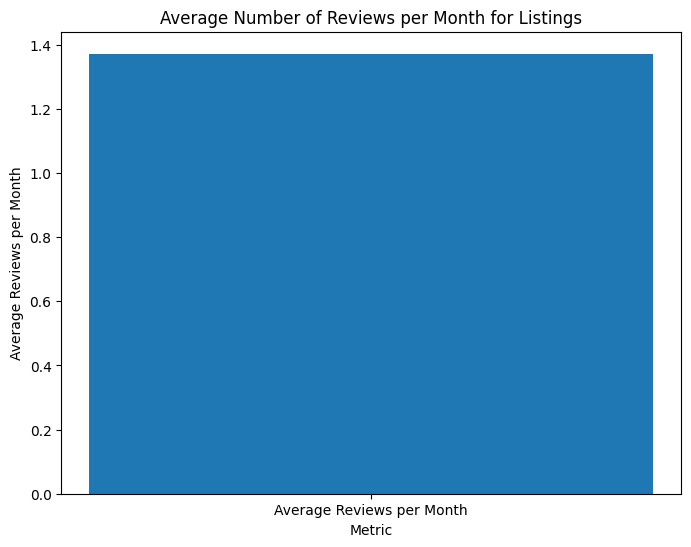

In [52]:
average_reviews_per_month = airbnb_df['reviews_per_month'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Average Reviews per Month'], [average_reviews_per_month])
plt.xlabel('Metric')
plt.ylabel('Average Reviews per Month')
plt.title('Average Number of Reviews per Month for Listings')
plt.show()

Which host has the highest number of listings?

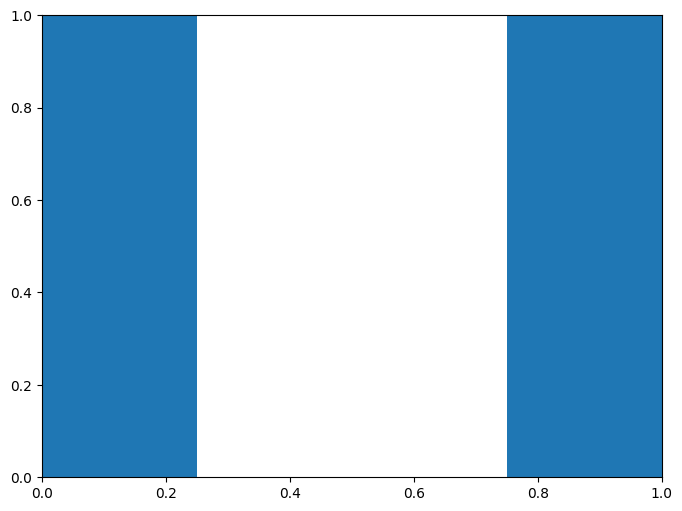

In [54]:
host_listings_counts = airbnb_df['host_id'].value_counts()
host_with_most_listings = host_listings_counts.idxmax()
highest_listings_count = host_listings_counts.max()

plt.figure(figsize=(8, 6))
host_listings_counts.plot(kind='bar')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Host')
plt.xticks(rotation=45)
plt.show()

print("Host with the highest number of listings:", host_with_most_listings)
print("Number of listings:", highest_listings_count)

What is the average availability (in days) for each neighbourhood group?

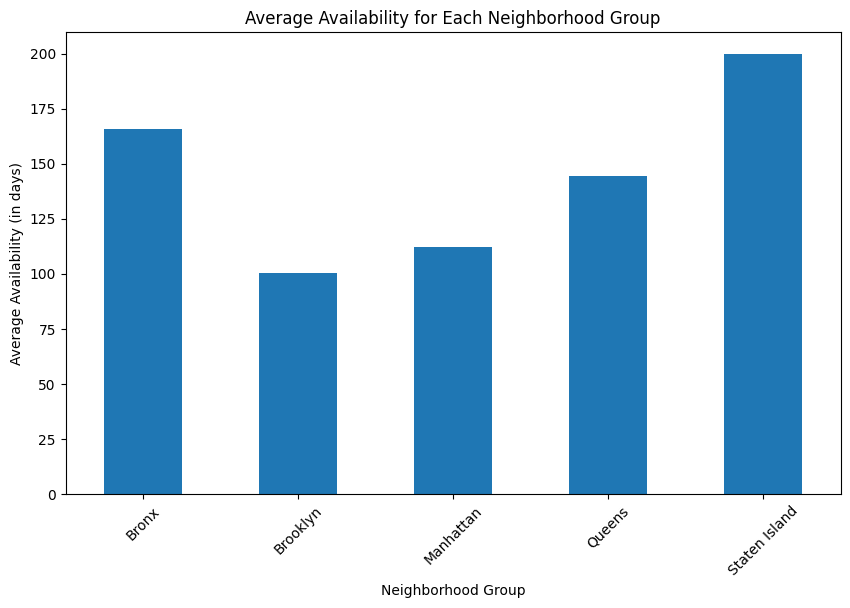

In [55]:
average_availability_neighborhood = airbnb_df.groupby('neighbourhood_group')['availability_365'].mean()

plt.figure(figsize=(10, 6))
average_availability_neighborhood.plot(kind='bar')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Availability (in days)')
plt.title('Average Availability for Each Neighborhood Group')
plt.xticks(rotation=45)
plt.show()

How many listings have availability greater than 180 days?

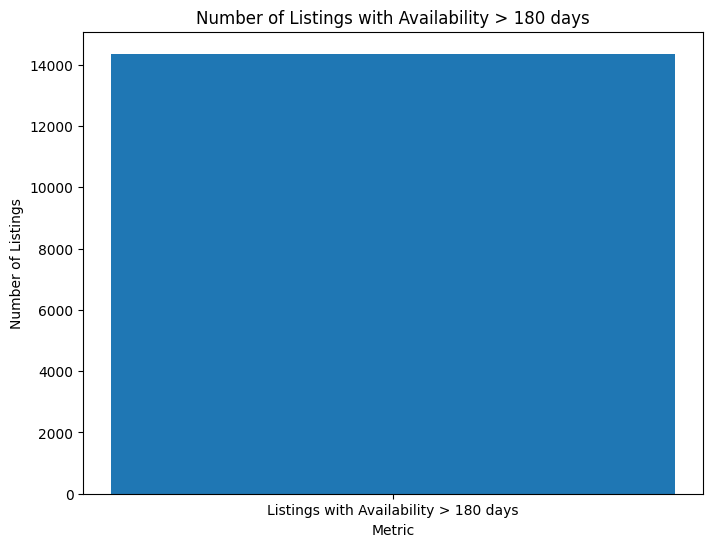

Number of listings with availability > 180 days: 14355


In [58]:
listings_greater_than_180 = airbnb_df[airbnb_df['availability_365'] > 180]
count_listings_greater_than_180 = len(listings_greater_than_180)

plt.figure(figsize=(8, 6))
plt.bar(['Listings with Availability > 180 days'], [count_listings_greater_than_180])
plt.xlabel('Metric')
plt.ylabel('Number of Listings')
plt.title('Number of Listings with Availability > 180 days')
plt.show()

print("Number of listings with availability > 180 days:", count_listings_greater_than_180)

What is the average number of reviews for each neighbourhood group?

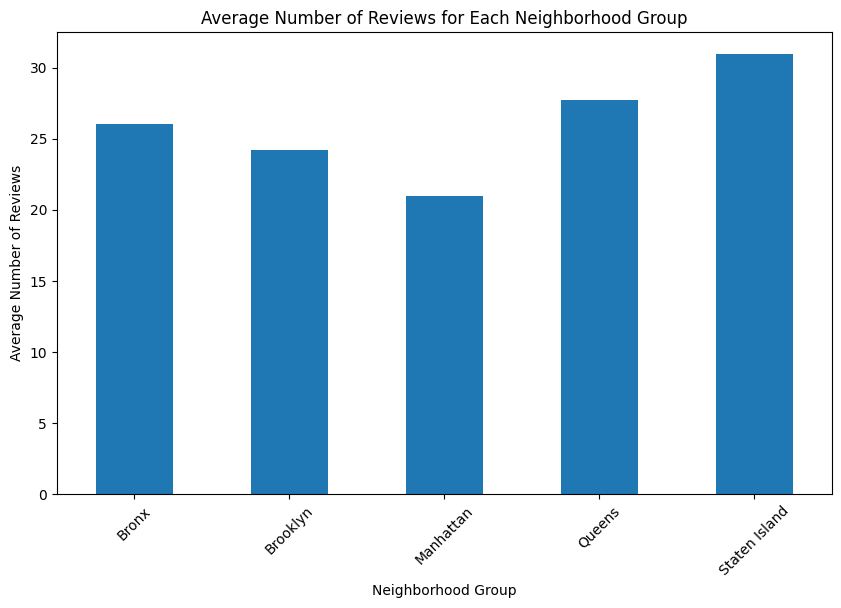

In [59]:
average_reviews_neighborhood = airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].mean()

plt.figure(figsize=(10, 6))
average_reviews_neighborhood.plot(kind='bar')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews for Each Neighborhood Group')
plt.xticks(rotation=45)
plt.show()

What is the correlation between price and availability?

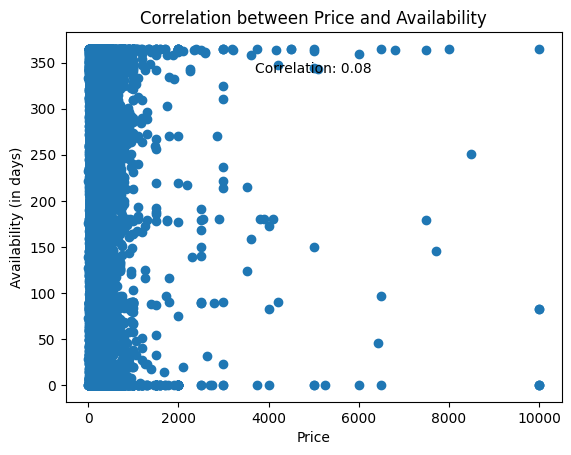

Correlation between price and availability: 0.08181709550826806


In [60]:
correlation = airbnb_df['price'].corr(airbnb_df['availability_365'])

plt.scatter(airbnb_df['price'], airbnb_df['availability_365'])
plt.xlabel('Price')
plt.ylabel('Availability (in days)')
plt.title('Correlation between Price and Availability')
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

print("Correlation between price and availability:", correlation)

What is the correlation between price and the number of reviews?

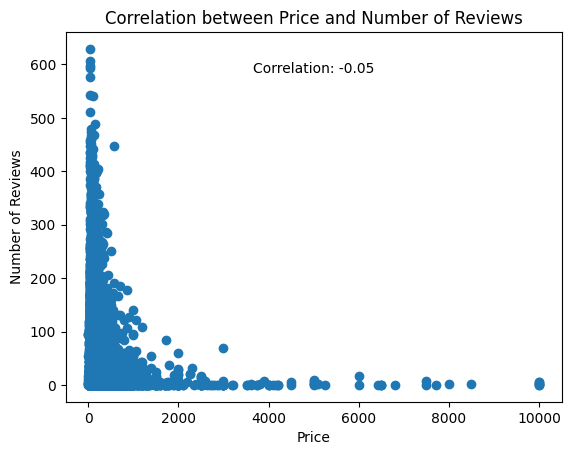

Correlation between price and number of reviews: -0.04794862048370002


In [62]:
correlation = airbnb_df['price'].corr(airbnb_df['number_of_reviews'])

plt.scatter(airbnb_df['price'], airbnb_df['number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Correlation between Price and Number of Reviews')
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

print("Correlation between price and number of reviews:", correlation)

What is the average number of minimum nights required for each room type?

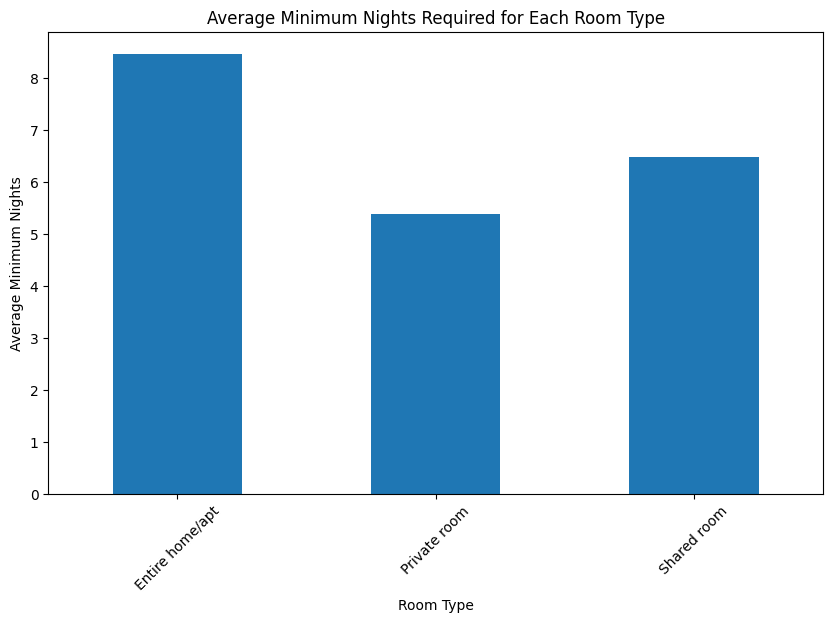

In [63]:
average_min_nights_room_type = airbnb_df.groupby('room_type')['minimum_nights'].mean()

plt.figure(figsize=(10, 6))
average_min_nights_room_type.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.title('Average Minimum Nights Required for Each Room Type')
plt.xticks(rotation=45)
plt.show()

Are there any correlations between the latitude/longitude of a listing and its price or availability?

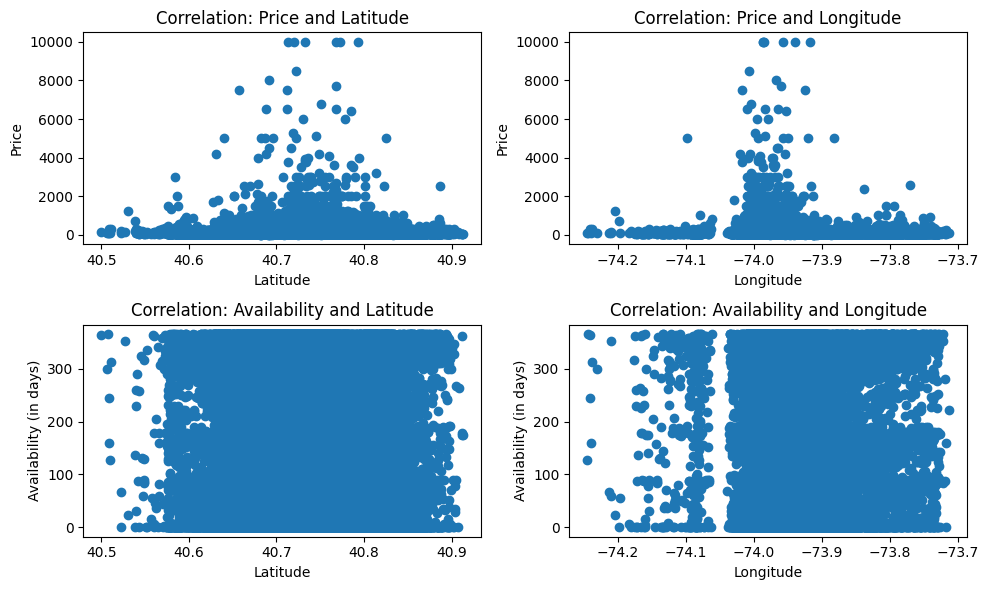

Correlation between price and latitude: 0.03394435596263229
Correlation between price and longitude: -0.14995396627606514
Correlation between availability and latitude: -0.010775070046492596
Correlation between availability and longitude: 0.08275366008444557


In [64]:
correlation_price_latitude = airbnb_df['price'].corr(airbnb_df['latitude'])
correlation_price_longitude = airbnb_df['price'].corr(airbnb_df['longitude'])
correlation_availability_latitude = airbnb_df['availability_365'].corr(airbnb_df['latitude'])
correlation_availability_longitude = airbnb_df['availability_365'].corr(airbnb_df['longitude'])

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(airbnb_df['latitude'], airbnb_df['price'])
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.title('Correlation: Price and Latitude')

plt.subplot(2, 2, 2)
plt.scatter(airbnb_df['longitude'], airbnb_df['price'])
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.title('Correlation: Price and Longitude')

plt.subplot(2, 2, 3)
plt.scatter(airbnb_df['latitude'], airbnb_df['availability_365'])
plt.xlabel('Latitude')
plt.ylabel('Availability (in days)')
plt.title('Correlation: Availability and Latitude')

plt.subplot(2, 2, 4)
plt.scatter(airbnb_df['longitude'], airbnb_df['availability_365'])
plt.xlabel('Longitude')
plt.ylabel('Availability (in days)')
plt.title('Correlation: Availability and Longitude')

plt.tight_layout()
plt.show()

print("Correlation between price and latitude:", correlation_price_latitude)
print("Correlation between price and longitude:", correlation_price_longitude)
print("Correlation between availability and latitude:", correlation_availability_latitude)
print("Correlation between availability and longitude:", correlation_availability_longitude)

Which host has the highest average number of reviews per month?

/Users/damacm172_/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


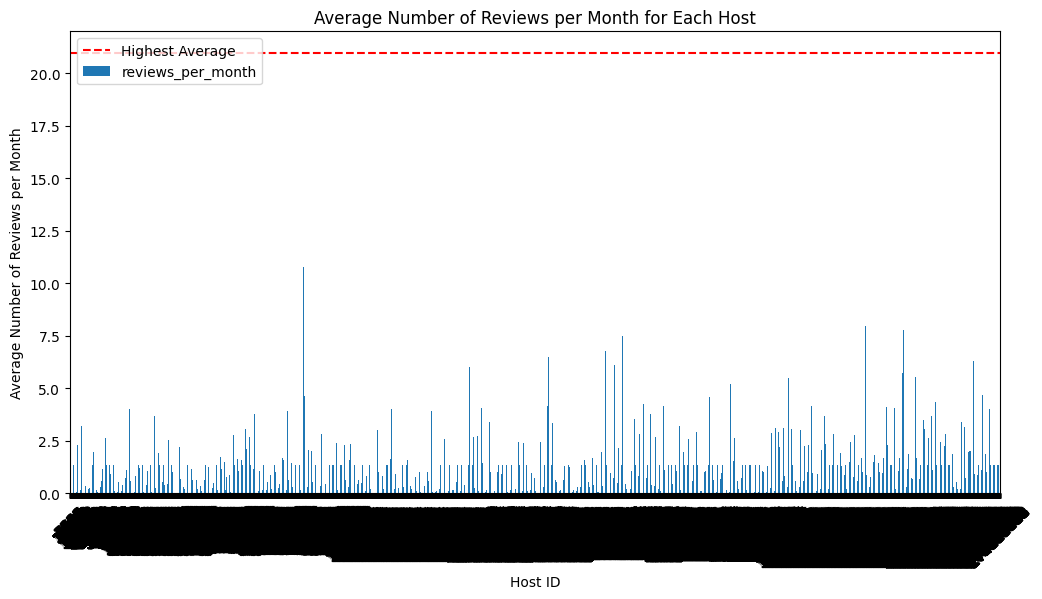

Host with the highest average number of reviews per month:
Host ID: 228415932
Average Number of Reviews per Month: 20.94


In [69]:
average_reviews_per_month_host = airbnb_df.groupby('host_id')['reviews_per_month'].mean()
highest_avg_reviews_per_month = average_reviews_per_month_host.max()
host_with_highest_avg_reviews_per_month = average_reviews_per_month_host.idxmax()

plt.figure(figsize=(12, 6))
average_reviews_per_month_host.plot(kind='bar')
plt.xlabel('Host ID')
plt.ylabel('Average Number of Reviews per Month')
plt.title('Average Number of Reviews per Month for Each Host')
plt.xticks(rotation=45)
plt.axhline(highest_avg_reviews_per_month, color='red', linestyle='--', label='Highest Average')
plt.legend()
plt.show()

print("Host with the highest average number of reviews per month:")
print("Host ID:", host_with_highest_avg_reviews_per_month)
print("Average Number of Reviews per Month:", highest_avg_reviews_per_month)

What is the overall trend of the number of listings over time? Are there any seasonal patterns?

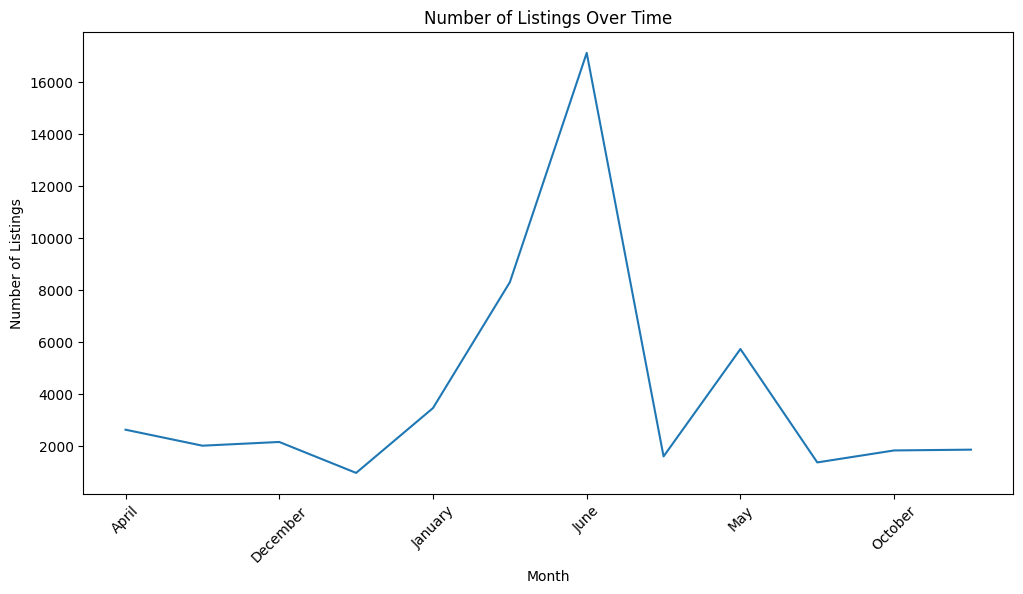

In [71]:
listings_over_time = airbnb_df.groupby('Month').size()

plt.figure(figsize=(12, 6))
listings_over_time.plot()
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.title('Number of Listings Over Time')
plt.xticks(rotation=45)
plt.show()

What are the busiest months for Airbnb rentals in terms of booking frequency?

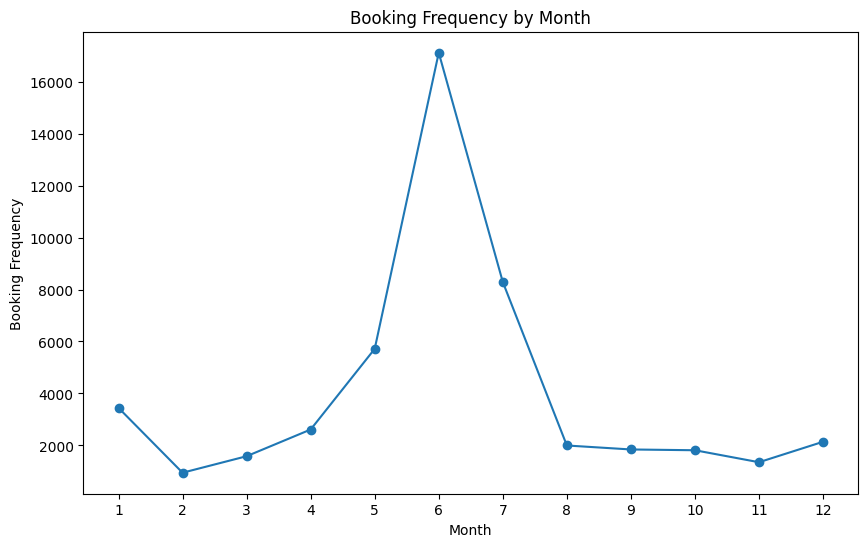

In [72]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
airbnb_df['month'] = airbnb_df['last_review'].dt.month
monthly_bookings = airbnb_df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Booking Frequency')
plt.title('Booking Frequency by Month')
plt.xticks(range(1, 13))
plt.show()